# **Naive Bayes Classification Challenge: End-to-End AI Pipeline**  
*From Data Cleaning to Model Comparison*  

In this hands-on challenge, **YOU** will go through a complete **AI/ML pipeline** using **Naive Bayes** classification. The dataset will have:  
✅ **Missing values** (requiring imputation)  
✅ **Categorical features** (requiring encoding)  
✅ **Text data** (if applicable, requiring TF-IDF/BOW)  
✅ **Numerical features** (for Gaussian Naive Bayes)  

---

## **Pipeline Steps**  
1. **Data Loading & Exploration**  
2. **Handling Missing Values**  
3. **Encoding Categorical Features**  
5. **Train-Test Split**  
6. **Naive Bayes from Scratch**  
7. **Naive Bayes using `scikit-learn`**  
8. **Model Comparison & Analysis**  

---

### **Learning Objectives**  
- Practice full ML workflow from raw data to evaluation  
- Compare manual vs. library implementations  
- Understand the impact of preprocessing decisions  

Let's begin!


# Data Loading & Exploration
**Objective**: Find and load the Titanic dataset, then perform initial exploration to identify data quality issues.


## Step 1: Import Required Libraries
## We'll use these key Python packages:
## - `pandas` for data manipulation
## - `numpy` for numerical operations
## - `matplotlib` and `seaborn` for visualization



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



## Step 1: Download the Data
First, obtain the Titanic dataset from this reliable source:  
📥 [Download Titanic Dataset](https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv)


## Step 2: Load into Python
Use pandas to load the data directly from URL or local file:



###Load directly from web (easiest method)
data = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

 Or if downloaded locally:

 data = pd.read_csv("titanic.csv")

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

## Data Inspection

### Displaying All Columns

pd.set_option('display.max_columns', None)  # Show all columns without truncation

print("First 5 rows:")

display(data.head())  # Interactive display of first 5 records

In [3]:
pd.set_option('display.max_columns', None)  # Show all columns without truncation

print("First 5 rows:")

display(data.head())  # Interactive display of first 5 records

First 5 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Statistical Summary

### Numerical Features Analysis

print("Numerical features summary:")
display(data.describe())

In [4]:
print("Numerical features summary:")
display(data.describe())

Numerical features summary:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#Missing Value Analysis

### Understanding Missing Data

print("Missing values per column:")

missing = data.isnull().sum()



In [5]:
print("Missing values per column:")

missing = data.isnull().sum()

print(missing)

Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64



#Target Variable Distribution
Essential for understanding class imbalance

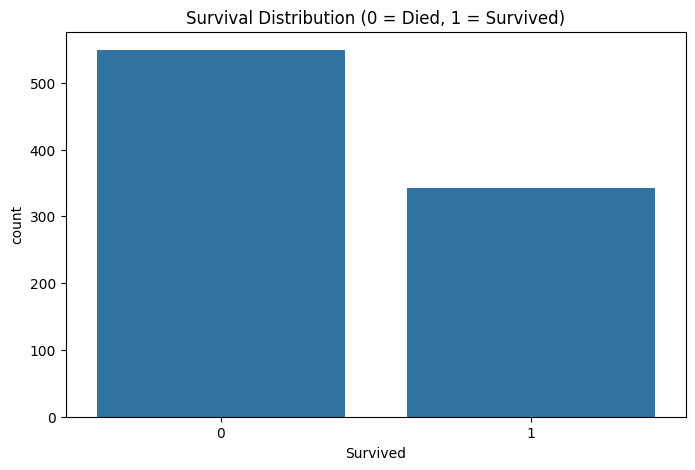

In [6]:
plt.figure(figsize=(8,5))
sns.countplot(x='Survived', data=data)
plt.title("Survival Distribution (0 = Died, 1 = Survived)")
plt.show()

## Handling Missing Values & Categorical Encoding

### 1. Filling Missing Values

#### Common Strategies:

from sklearn.impute import SimpleImputer

##For numerical columns (Age, Fare)
num_imputer = SimpleImputer(strategy='median')  # Alternatives: 'mean', 'constant'

data['Age'] = num_imputer.fit_transform(data[['Age']])

## For categorical columns (Embarked)
cat_imputer = SimpleImputer(strategy='most_frequent')

data['Embarked'] = cat_imputer.fit_transform(data[['Embarked']])

In [7]:
from sklearn.impute import SimpleImputer

# Missing colmns: Age (Numerical), Cabin (Non-Numerical), Embarked (Non-Numerical)

num_imputer = SimpleImputer(strategy='median')
data['Age'] = num_imputer.fit_transform(data[['Age']])

cat_imputer = SimpleImputer(strategy='most_frequent')
data['Embarked'] = cat_imputer.fit_transform(data[['Embarked']]).ravel() # Flatten the output

# Label Encoding: Essential Guide

## What is Label Encoding?
Converts categorical text values into numeric labels:
- Assigns a unique integer to each category
- Preserves no mathematical relationship between values

Before:           After:

['Dog']           [0]

['Cat']           [1]

['Bird']          [2]


# Initialize and fit
le = LabelEncoder()
encoded_colors = le.fit_transform(colors)

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])

display(data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In [9]:
# We have two non-numeric columns with non-unique values (Name, Cabin)
data['Title'] = data['Name'].str.extract(r',\s*([^\.]*)\s*\.', expand=False)

print("Unique titles along with their counts:")
print(sorted(data['Title'].unique()))

Unique titles along with their counts:
['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir', 'the Countess']


In [10]:
title_counts = data['Title'].value_counts()
print(title_counts)

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64


In [11]:
rare_titles = title_counts[title_counts <= 10].index.tolist()

# Normalizing to avoid several different titles
data['Title'] = data['Title'].replace(rare_titles, 'Rare')
title_counts = data['Title'].value_counts()
print("Title count after normalization: ")
print(title_counts)

# Dropping column 'Name' after title extraction
data.drop('Name', axis=1, inplace=True)

Title count after normalization: 
Title
Mr        517
Miss      182
Mrs       125
Master     40
Rare       27
Name: count, dtype: int64


In [12]:
data['Title'] = le.fit_transform(data['Title'])

In [13]:
# Extracting cabin letter from the cabin data and marking remaining as 'U'

data['CabinLetter'] = data['Cabin'].str[0]
data['CabinLetter'] = data['CabinLetter'].fillna('U')  # U = Unknown

data['HasCabin'] = data['Cabin'].notnull().astype(int)
data.drop('Cabin', axis=1, inplace=True)

display(data.head())

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,CabinLetter,HasCabin
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,2,2,U,0
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,0,3,C,1
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,2,1,U,0
3,4,1,1,0,35.0,1,0,113803,53.1000,2,3,C,1
4,5,0,3,1,35.0,0,0,373450,8.0500,2,2,U,0


In [14]:
data['CabinLetter'] = le.fit_transform(data['CabinLetter'])
display(data.head())

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,CabinLetter,HasCabin
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,2,2,8,0
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,0,3,2,1
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,2,1,8,0
3,4,1,1,0,35.0,1,0,113803,53.1000,2,3,2,1
4,5,0,3,1,35.0,0,0,373450,8.0500,2,2,8,0


In [15]:
# Extract prefix: all characters before the last number chunk
data['TicketPrefix'] = data['Ticket'].str.extract(r'^([^\d]+)', expand=False)
data['TicketPrefix'] = data['TicketPrefix'].str.replace(r'[\./]', '', regex=True)  # Clean dots/slashes
data['TicketPrefix'] = data['TicketPrefix'].str.strip().fillna('None')

prefix_counts = data['TicketPrefix'].value_counts()
print(prefix_counts)


TicketPrefix
None          661
PC             60
CA             41
A              28
STONO          18
SOTONOQ        15
WC             10
SCPARIS         7
SOC             6
C               5
FCC             5
LINE            4
SCParis         4
PP              3
WEP             3
SOPP            3
PPP             2
SOTONO          2
SCAH            2
SWPP            2
SCA             1
SP              1
SCOW            1
Fa              1
SOP             1
SC              1
SCAH Basle      1
AS              1
FC              1
CASOTON         1
Name: count, dtype: int64


In [16]:
# Dropping non-valuable fields
data.drop('PassengerId', axis=1, inplace=True)
data.drop(['Ticket', 'TicketPrefix'], axis=1, inplace=True)


In [17]:
display(data.head())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,CabinLetter,HasCabin
0,0,3,1,22.0,1,0,7.2500,2,2,8,0
1,1,1,0,38.0,1,0,71.2833,0,3,2,1
2,1,3,0,26.0,0,0,7.9250,2,1,8,0
3,1,1,0,35.0,1,0,53.1000,2,3,2,1
4,0,3,1,35.0,0,0,8.0500,2,2,8,0


In [18]:
prefix_counts = data['Parch'].value_counts()
print(prefix_counts)

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


# Data Splitting: Train-Test Validation

## Why Split Data?
- **Train set**: Used to train the model (~70-80%)
- **Test set**: Used to evaluate final performance (~20-30%)
- Prevents overfitting by testing on unseen data

## Basic Splitting (sklearn)

from sklearn.model_selection import train_test_split

## Features (X) and Target (y)
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

## Split with 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,  # For reproducibility
    stratify=y       # Preserves class distribution
)

print(f"Train size: {len(X_train)} samples")

print(f"Test size: {len(X_test)} samples")

In [19]:
from sklearn.model_selection import train_test_split

X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Train size: {len(X_train)} samples")
print(f"Test size: {len(X_test)} samples")

Train size: 712 samples
Test size: 179 samples


# Naive Bayes Implementation from scratch

## The 3-Step Process

1. **Calculate Priors (P(y))**  
   - Estimate class probabilities from training data  
   - Example: In Titanic dataset, P(Survived=1) ≈ 38%, P(Survived=0) ≈ 62%

2. **Compute Likelihoods (P(X|y))**  
   - For continuous features: Assume Gaussian distribution  
     ```math
     P(x_i|y) = \frac{1}{\sqrt{2\pi\sigma_y^2}}e^{-\frac{(x-\mu_y)^2}{2\sigma_y^2}}
     ```
   - For categorical features: Use frequency counts  
   - *Naive* assumption: Features are conditionally independent  
     ```math
     P(X|y) = \prod_{i=1}^n P(x_i|y)
     ```

3. **Predict Using Posteriors**  
   - Apply Bayes' Theorem (ignoring denominator P(X)):  
     ```math
     P(y|X) \propto P(y) \times \prod_{i=1}^n P(x_i|y)
     ```
   - Practical implementation uses log probabilities:  
     ```python
     log_posterior = log(P(y)) + sum(log(P(x_i|y)))
     ```
   - Final prediction: Class with highest log posterior

## Titanic Example Walkthrough
For a passenger with [Age=25, Fare=50]:

1. **Calculate for Survived=0**  
   - log P(Age=25|0) = -1.2  
   - log P(Fare=50|0) = -4.5  
   - log P(0) = -0.48  
   - **Total**: -6.18

2. **Calculate for Survived=1**  
   - log P(Age=25|1) = -1.5  
   - log P(Fare=50|1) = -3.8  
   - log P(1) = -0.92  
   - **Total**: -6.22

3. **Prediction**: argmax(-6.18, -6.22) → Survived=0



In [20]:
import numpy as np

class GaussianNaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.priors = {}
        self.means = {}
        self.stds = {}

        for cls in self.classes:
            X_cls = X[y == cls]
            self.priors[cls] = len(X_cls) / len(X)
            self.means[cls] = X_cls.mean()
            self.stds[cls] = X_cls.std()

    def calculate_likelihood(self, mean, std, x):
        exponent = - ((x - mean) ** 2) / (2 * std ** 2)
        return (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(exponent)

    def predict(self, X):
        preds = []
        for _, row in X.iterrows():
            posteriors = {}
            for cls in self.classes:
                prior = np.log(self.priors[cls])
                likelihoods = np.log(self.calculate_likelihood(self.means[cls], self.stds[cls], row) + 1e-9)
                total = prior + np.sum(likelihoods)
                posteriors[cls] = total
            preds.append(max(posteriors, key=posteriors.get))
        return preds


In [21]:
# Instantiate and train
gnb = GaussianNaiveBayes()
gnb.fit(X_train, y_train)

# Predict and evaluate
y_pred = gnb.predict(X_test)

# scikit-learn's Naive Bayes

### 1. Overview of Implementations

### GaussianNB
- **Use Case**: Continuous features assumed to follow normal distribution
- **Math**: Uses Gaussian probability density function
- **Best For**: Medical diagnosis, sensor data

### MultinomialNB
- **Use Case**: Discrete counts (word frequencies in text)
- **Math**: Uses multinomial distribution
- **Best For**: Text classification, recommendation systems

### BernoulliNB
- **Use Case**: Binary/boolean features
- **Math**: Binomial distribution
- **Best For**: Spam detection, document categorization

### ComplementNB
- **Use Case**: Imbalanced text datasets
- **Math**: Adapts MultinomialNB for class imbalance
- **Best For**: Sentiment analysis with skewed classes

### CategoricalNB
- **Use Case**: Categorical features with discrete values
- **Math**: Categorical distribution
- **Best For**: Survey data, categorical attributes

## 2. Detailed Implementation

### GaussianNB for Titanic Survival
```python
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create pipeline with scaling
nb_pipe = make_pipeline(
    StandardScaler(),
    GaussianNB(var_smoothing=1e-9)
)

# Fit and predict
nb_pipe.fit(X_train, y_train)
y_proba = nb_pipe.predict_proba(X_test)

# Access learned parameters
gnb = nb_pipe.named_steps['gaussiannb']
print("Class means:\n", gnb.theta_)
print("Class variances:\n", gnb.sigma_)

In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create pipeline with scaling
nb_pipe = make_pipeline(
    StandardScaler(),
    GaussianNB(var_smoothing=1e-9)
)

# Fit and predict
nb_pipe.fit(X_train, y_train)

y_proba = nb_pipe.predict_proba(X_test)
y_pred_sklearn = nb_pipe.predict(X_test)

gnb = nb_pipe.named_steps['gaussiannb']
print("Class means:\n", gnb.theta_)
print("Class variances:\n", gnb.var_)

Class means:
 [[ 0.27443312  0.43306865  0.05624567  0.02059375 -0.0663815  -0.21725472
   0.14904077  0.02371732  0.25699645 -0.27642661]
 [-0.44130454 -0.69639977 -0.09044634 -0.03311595  0.10674534  0.34935833
  -0.2396663  -0.03813884 -0.41326535  0.44451019]]
Class variances:
 [[0.75222961 0.55065895 0.92106202 1.35361715 1.05139217 0.40693731
  0.78972984 0.5870691  0.5932486  0.55897178]
 [1.08257104 0.9360052  1.11366915 0.42958426 0.89887789 1.75572858
  1.24496676 1.66165797 1.37708412 1.38873548]]


# Model Evaluation: Accuracy & Confusion Matrix

## Key Metrics Explained

**1. Accuracy**  
- Measures overall correctness: `(TP + TN) / (TP + TN + FP + FN)`  
- Best for balanced datasets  
- **Limitation**: Misleading with class imbalance  

**2. Confusion Matrix**  
Visualizes model performance across classes:

In [23]:
# Essential imports
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
print("📦 From-Scratch Model:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("⚙️ Scikit-learn Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_sklearn))
print(classification_report(y_test, y_pred_sklearn))


📦 From-Scratch Model:
Accuracy: 0.7150837988826816
              precision    recall  f1-score   support

           0       0.74      0.82      0.78       110
           1       0.66      0.55      0.60        69

    accuracy                           0.72       179
   macro avg       0.70      0.68      0.69       179
weighted avg       0.71      0.72      0.71       179

⚙️ Scikit-learn Model:
Accuracy: 0.7150837988826816
              precision    recall  f1-score   support

           0       0.74      0.82      0.78       110
           1       0.66      0.55      0.60        69

    accuracy                           0.72       179
   macro avg       0.70      0.68      0.69       179
weighted avg       0.71      0.72      0.71       179



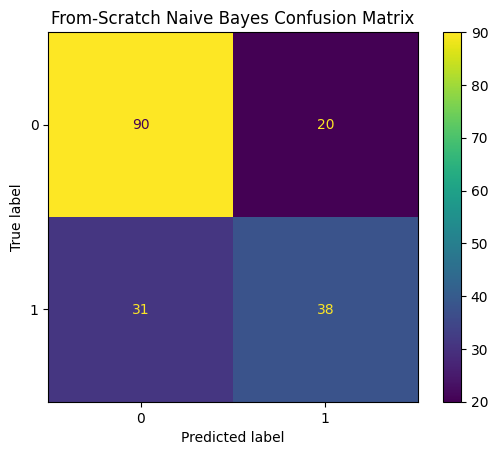

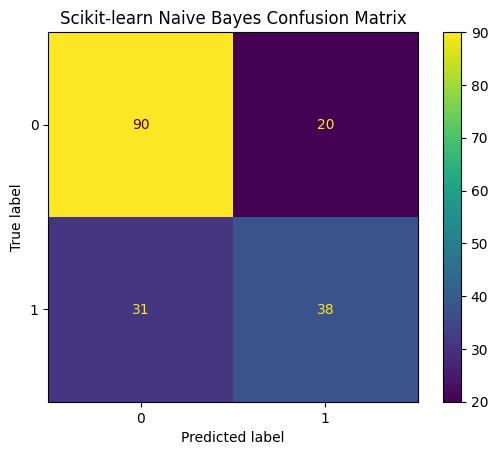

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay

# From-scratch
cm_scratch = confusion_matrix(y_test, y_pred)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_scratch, display_labels=[0, 1])
disp1.plot()
plt.title("From-Scratch Naive Bayes Confusion Matrix")
plt.show()

# Scikit-learn
cm_sklearn = confusion_matrix(y_test, y_pred_sklearn)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_sklearn, display_labels=[0, 1])
disp2.plot()
plt.title("Scikit-learn Naive Bayes Confusion Matrix")
plt.show()
